### Sanitizing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("sessions.csv")
df['datum'] = pd.to_datetime(df['datum'], format='%Y-%m-%d')
df["cr"] = round(df["sess_co_done"]/df["sessions"], 3)

print(df['datum'].min(), df['datum'].max())
#df.sort_values("cr", ascending=False)
#prt = df[["","jump_offs", "sess_cart_add", "sess_co", "sess_co_done", "sessions"]]
part = df[["jump_offs", "sess_cart_add", "sess_co", "sess_co_done", "sessions"]].sum()
part.to_csv("kpi.csv")

2024-10-01 00:00:00 2025-08-01 00:00:00


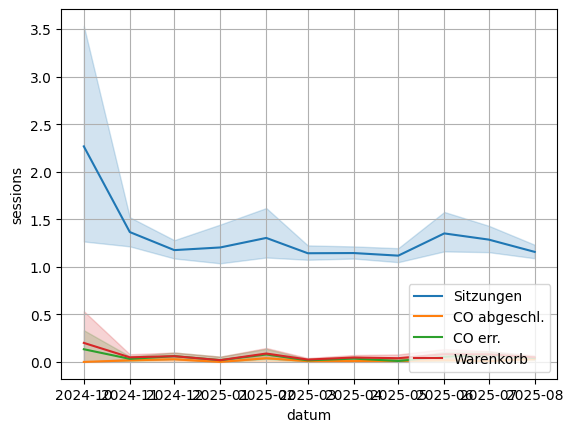

In [19]:
sns.lineplot(df, x="datum", y="sessions", label="Sitzungen")
sns.lineplot(df, x="datum", y="sess_co_done", label="CO abgeschl.")
sns.lineplot(df, x="datum", y="sess_co", label="CO err.")
sns.lineplot(df, x="datum", y="sess_cart_add", label="Warenkorb")
plt.legend(loc='lower right')
 
# Add a grid
plt.grid(True)
plt.show()

In [22]:
px.line(df, x="datum", y="sess_cart_add")
plt.show()

In [ ]:
df["cr"] = round(df["sess_co_done"]/df["sessions"], 3)
max = df["cr"].max()
min = df["cr"].min()
avg = df["cr"].mean()
sesssions = df["sessions"].sum()

[max, min, avg]

[np.float64(1.0), np.float64(0.0), np.float64(0.014856108597285068)]

In [38]:
df["sess_type"] = "Absprung"
co = df[[ 'datum', 'sess_ctry', 'sess_loc','sug_platform', 'landing_uri',
        'session_duration', 'pages_per_sess', 'jump_offs', "sess_type"]]

co.to_csv("_jo.csv")
# , 'sess_cart_add','sess_co_done', 'sessions', 'cr'
co   


,datum,sess_ctry,sess_loc,sug_platform,landing_uri,session_duration,pages_per_sess,jump_offs,sess_type
0,2024-10-01,Germany,Nuremberg,direct,https://www.whiskyquartier.de/pages/datenschutz,368.000000,5.000000,0,Absprung
1,2024-10-01,Germany,Munich,direct,https://www.whiskyquartier.de/products/kavalan...,237.000000,7.000000,0,Absprung
2,2024-10-01,United Kingdom,London,direct,https://www.whiskyquartier.de/password,0.000000,1.000000,1,Absprung
3,2024-10-01,Germany,Hausach,direct,https://7bb991-55.myshopify.com/,0.000000,1.000000,1,Absprung
4,2024-10-01,Germany,Burgthann,direct,https://7bb991-55.myshopify.com/,327.555556,1.888889,7,Absprung
...,...,...,...,...,...,...,...,...,...
2205,2025-08-01,Germany,Bochum,direct,https://www.whiskyquartier.de/account/subscrib...,42.000000,3.000000,0,Absprung
2206,2025-08-01,Germany,Altfraunhofen,meta,https://www.whiskyquartier.de/?utm_source=FB+W...,102.000000,2.000000,0,Absprung
2207,2025-08-01,Portugal,Guimarães,direct,https://www.whiskyquartier.de/products/kavalan...,0.000000,1.000000,1,Absprung
2208,2025-08-01,Germany,Leipzig,meta,https://www.whiskyquartier.de/?utm_source=FB+W...,54.000000,3.000000,0,Absprung


In [ ]:
df = pd.read_csv("sessions.csv")
df_loc = df.groupby(["sess_ctry", "sess_loc"])['sessions'].sum()
df_loc.to_csv("sess_loc.csv")



In [12]:
df[df["sess_ctry"] != "Germany"]["sess_loc"].unique()

array(['London', nan, 'Kyiv', 'Montreal', 'Dublin', 'Varna', 'Amsterdam',
       'Helsinki', 'Gwanak-gu', 'Vila Nova de Famalicão', 'Sisak',
       'Purmerend', 'Charlottenlund', 'Beroun', 'Doetinchem', 'Singapore',
       'Prague', 'Narón', 'Clonee', 'Manchester', 'Drunen', 'Bengaluru',
       'České Budějovice', 'Tokyo', 'Biên Hòa', 'Stockholm', 'Glasgow',
       "Santa Vittoria d'Alba", 'Pijnacker', 'Hendrik-Ido-Ambacht',
       'Casal Comba', 'Kabul', 'Luleå', 'Lisbon', 'Vienna', 'Santiago',
       'Spijkenisse', 'Eindhoven', 'Sofia', 'Alphen aan den Rijn',
       'Salzburg', 'Nassau', 'Graz', 'Konya', 'Beauharnois',
       'Santa Coloma de Farners', 'Bupyeong-gu', 'Corbeil-Essonnes',
       'San José', 'Mons', 'Rotterdam', 'Lucknow', 'Istanbul', 'Rosenau',
       'Ehrendingen', 'Veldhoven', 'Žatec', 'Ghent', 'Maastricht',
       'Hong Kong', 'Arnhem', 'St Petersburg', 'Praia', 'Aarau',
       'Uitikon', 'Český Brod', 'Antwerp', 'Lviv', 'Bandhagen', 'Rząśnik',
       'Zurich', 'Kao

In [39]:
min = df["datum"].min()
max = df["datum"].max()
f"Im Zeiotraum {min} bis {max}"

'Im Zeiotraum 2024-10-01 00:00:00 bis 2025-08-01 00:00:00'